In [1]:
import pandas as pd

In [2]:
dados = pd.read_csv('creditcard.csv')

In [3]:
n_transacoes = dados['Class'].count()
n_fraudes = dados['Class'].sum()
n_normais = n_transacoes - n_fraudes
fraudes_porc = n_fraudes / n_transacoes
normais_porc = n_normais / n_transacoes

print("Número de transações: ", n_transacoes)
print("Número de fraudes: ", n_fraudes, "%.2f" %(fraudes_porc*100))
print("Número de transações normais: ", n_normais, "%.2f" %(normais_porc*100))

Número de transações:  284807
Número de fraudes:  492 0.17
Número de transações normais:  284315 99.83


In [4]:
from sklearn.model_selection import StratifiedShuffleSplit

def executar_validador(X, y):

    validador = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=0)

    for treino_id, teste_id in validador.split(X, y):
        X_train, X_test = X[treino_id], X[teste_id]
        y_train, y_test = y[treino_id], y[teste_id]

    return X_train, X_test, y_train, y_test

In [5]:
from sklearn.tree import DecisionTreeClassifier

def executar_classificador(classificador, X_train, X_test, y_train):
    arvore = classificador.fit(X_train, y_train)
    y_predict = arvore.predict(X_test)
    return y_predict

In [6]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


def salvar_arvore(classificador, nome):
    plt.figure(figsize=(200, 100))
    plot_tree(classificador, filled=True, fontsize=14)
    plt.savefig(nome)
    plt.close()

In [7]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

def validar_arvore(y_predict, y_test):
    print("acurácia:", accuracy_score(y_test, y_predict))
    print("precisao", precision_score(y_test, y_predict))
    print("recall", recall_score(y_test, y_predict))
    print("matriz de confusão", confusion_matrix(y_test, y_predict))

In [8]:
X = dados.drop('Class', axis=1).values
y = dados['Class'].values

classificador = DecisionTreeClassifier()

X_train, X_test, y_train, y_test = executar_validador(X, y)
y_predict = executar_classificador(classificador, X_train, X_test, y_train)

In [9]:
validar_arvore(y_predict, y_test)

acurácia: 0.9991222218320986
precisao 0.7727272727272727
recall 0.6938775510204082
matriz de confusão [[28422    10]
 [   15    34]]


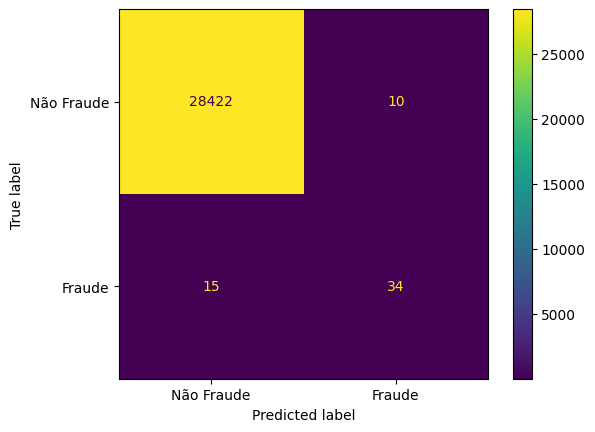

In [10]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_predict), display_labels=['Não Fraude', 'Fraude'])
disp.plot()

In [11]:
classificador_com_10 = DecisionTreeClassifier(max_depth=10, random_state=0)

X_train, X_test, y_train, y_test = executar_validador(X, y)
y_predict = executar_classificador(classificador_com_10, X_train, X_test, y_train)

In [12]:
validar_arvore(y_predict, y_test)

acurácia: 0.9994733330992591
precisao 0.9473684210526315
recall 0.7346938775510204
matriz de confusão [[28430     2]
 [   13    36]]


In [13]:
classificador_com_10_min_folhas = DecisionTreeClassifier(max_depth=10, random_state=0, min_samples_leaf=10)

X_train, X_test, y_train, y_test = executar_validador(X, y)
y_predict = executar_classificador(classificador_com_10_min_folhas, X_train, X_test, y_train)

In [14]:
validar_arvore(y_predict, y_test)

acurácia: 0.9993679997191109
precisao 0.8604651162790697
recall 0.7551020408163265
matriz de confusão [[28426     6]
 [   12    37]]


In [15]:
classificador_com_5 = DecisionTreeClassifier(max_depth=5, random_state=0)

X_train, X_test, y_train, y_test = executar_validador(X, y)
y_predict = executar_classificador(classificador_com_5, X_train, X_test, y_train)

In [16]:
validar_arvore(y_predict, y_test)

acurácia: 0.999403110845827
precisao 0.9210526315789473
recall 0.7142857142857143
matriz de confusão [[28429     3]
 [   14    35]]


In [17]:
from sklearn.ensemble import RandomForestClassifier

florest = RandomForestClassifier(n_estimators=50, random_state=0, max_depth=10)
y_pred_florest = executar_classificador(florest, X_train, X_test, y_train)

In [18]:
validar_arvore(y_pred_florest, y_test)

acurácia: 0.9995435553526912
precisao 0.9736842105263158
recall 0.7551020408163265
matriz de confusão [[28431     1]
 [   12    37]]


In [23]:
from sklearn.ensemble import AdaBoostClassifier

classificador_adaboost = AdaBoostClassifier(random_state=0, n_estimators=100)
y_pred_adaboost = executar_classificador(classificador_adaboost, X_train, X_test, y_train)

In [24]:
salvar_arvore(classificador_adaboost.estimators_[0],"adaboost0.png")
salvar_arvore(classificador_adaboost.estimators_[1],"adaboost1.png")

In [25]:
validar_arvore(y_pred_adaboost, y_test)

acurácia: 0.999403110845827
precisao 0.8636363636363636
recall 0.7755102040816326
matriz de confusão [[28426     6]
 [   11    38]]
